In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [44]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


Data preprocesing

In [46]:
print("Number of duplicates in train:",sum(train.duplicated()))

Number of duplicates in train: 0


In [47]:
print("Number of duplicates in test:",sum(test.duplicated()))

Number of duplicates in test: 0


In [48]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [49]:
test.isna().sum

<bound method DataFrame.sum of      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                False              False              False   
1                False              False              False   
2                False              False              False   
3                False              False              False   
4                False              False              False   
..                 ...                ...                ...   
994              False              False              False   
995              False              False              False   
996              False              False              False   
997              False              False              False   
998              False              False              False   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0               False             False             False             False   
1               False             False   

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

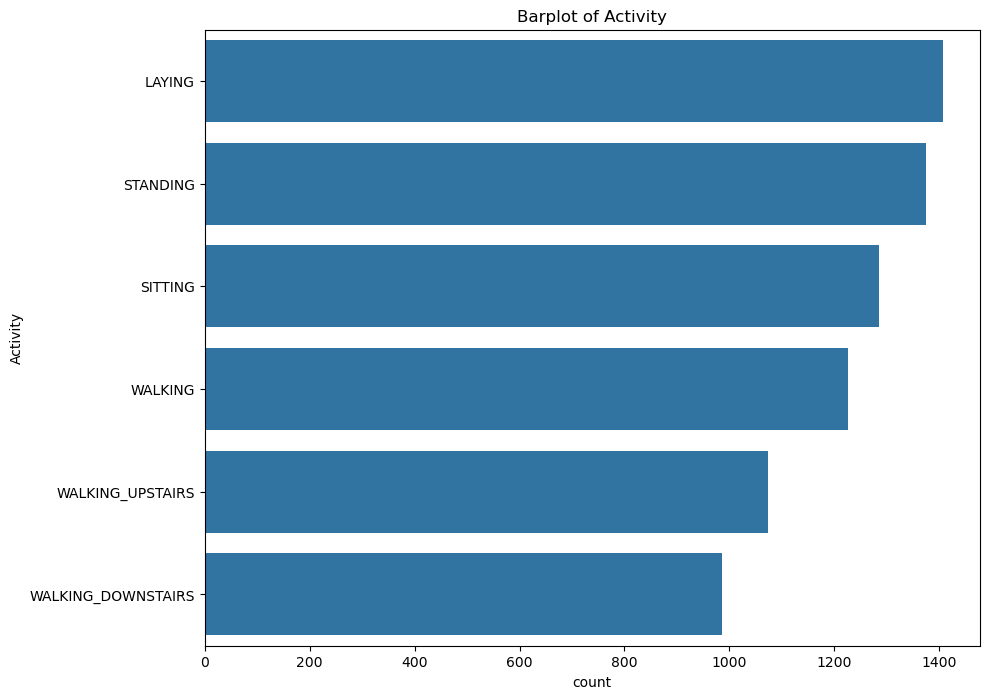

In [50]:
plt.figure(figsize=(10,8))
plt.title("Barplot of Activity")
sns.countplot(train.Activity,order=train.Activity.value_counts().index)
plt.xticks(30)
plt.show()

EDA

In [51]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [52]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), 
                       orient = "index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Analysing tBodyAccMag-mean feature

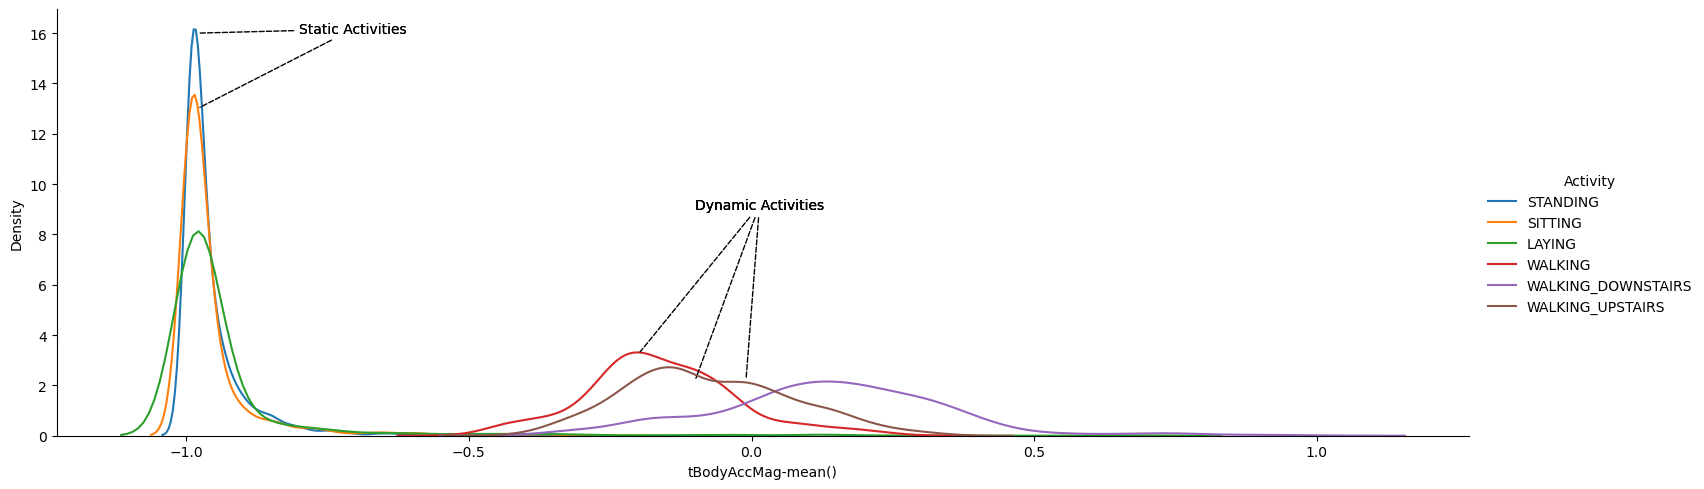

In [53]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()
plt.annotate('Static Activities',xy=(-.98,18),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,13),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.98,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate('Dynamic Activities',xy=(-0.2,3.25),xytext=(-.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(-0.1,2.18),xytext=(-.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(-0.01,2.15),xytext=(-.1,9),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.show()

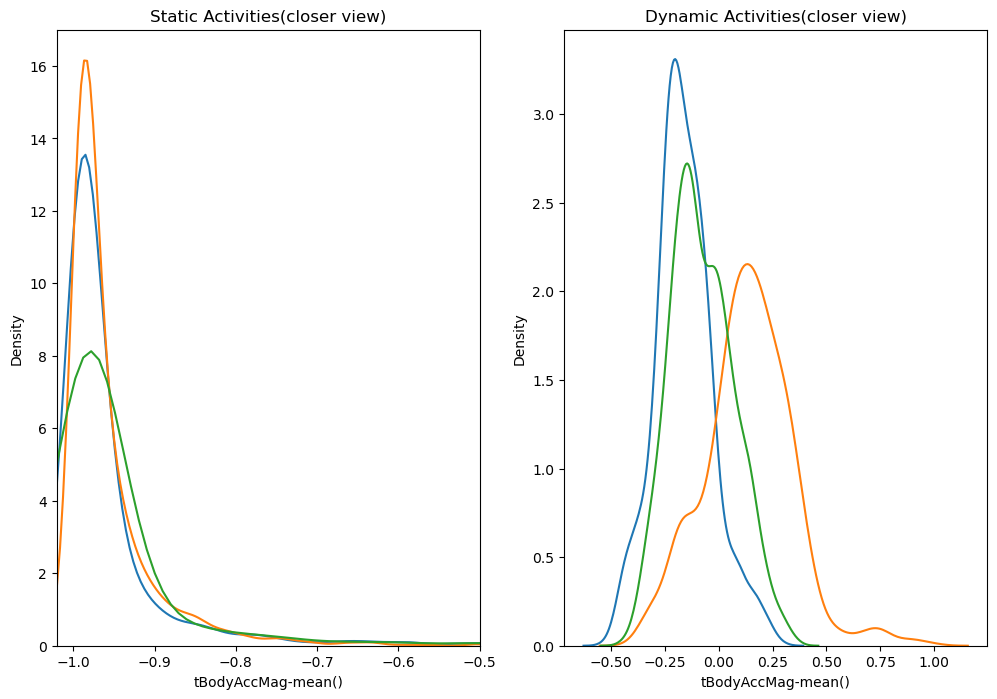

In [54]:

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

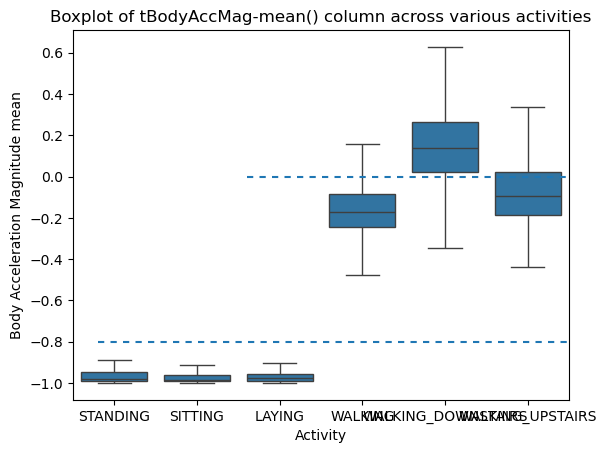

In [55]:
sns.boxplot(x="Activity",y="tBodyAccMag-mean()",data=train,showfliers=False)
plt.ylabel("Body Acceleration Magnitude mean")
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.8,xmin=0.05,dashes=(3,3))
plt.axhline(y=0.0,xmin=0.35,dashes=(3,3))
plt.show()

Analysing Angle Between X-Axis and gravity Mean feature

TypeError: axline() missing 1 required positional argument: 'xy1'

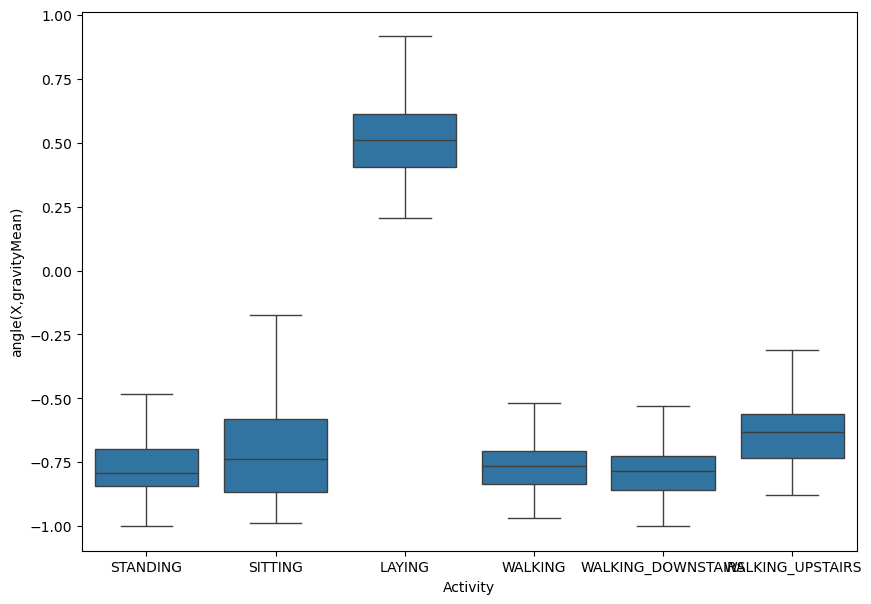

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity",y="angle(X,gravityMean)",data=train,showfliers=False)
plt.axline(y=0.08,xmin=0.1,xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angle(X,gravityMean) column across various activities")
plt.xticks(rotation=30)
plt.show()

Analysing Angle between Y axis and gravityMean feature

TypeError: axline() missing 1 required positional argument: 'xy1'

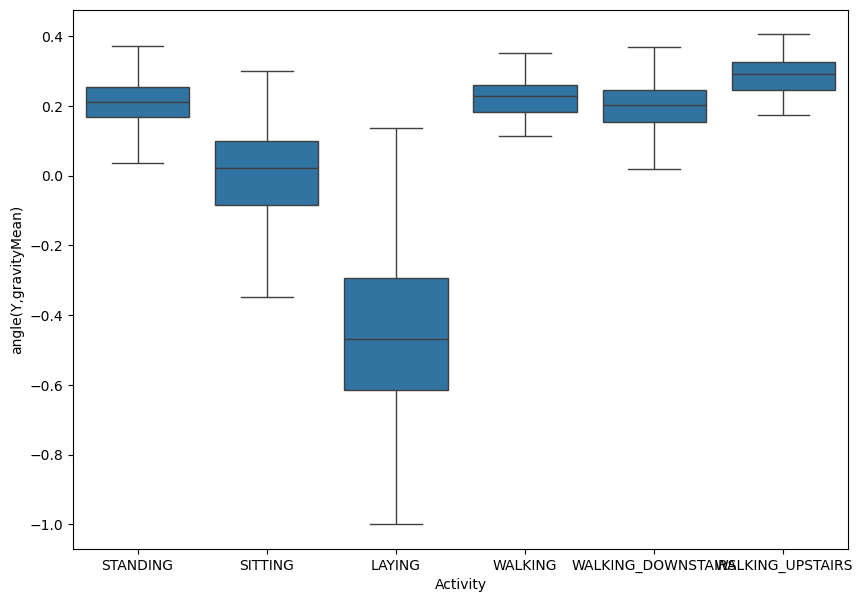

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity",y="angle(Y,gravityMean)",data=train,showfliers=False)
plt.axline(y=-0.35,ymin=0.1,dashes=(3,3))
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title("Box plot of angle(X,gravityMean) column across various activities")
plt.xticks(rotation=90)
plt.show()

In [58]:
x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)

In [59]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

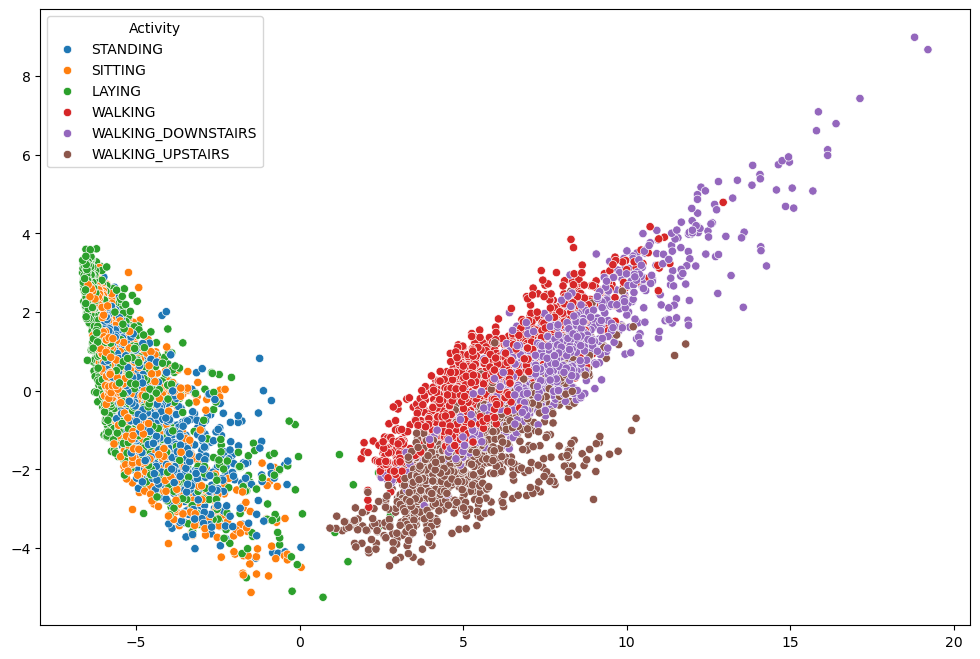

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

Visualizing using TSNE

In [61]:
x_for_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)

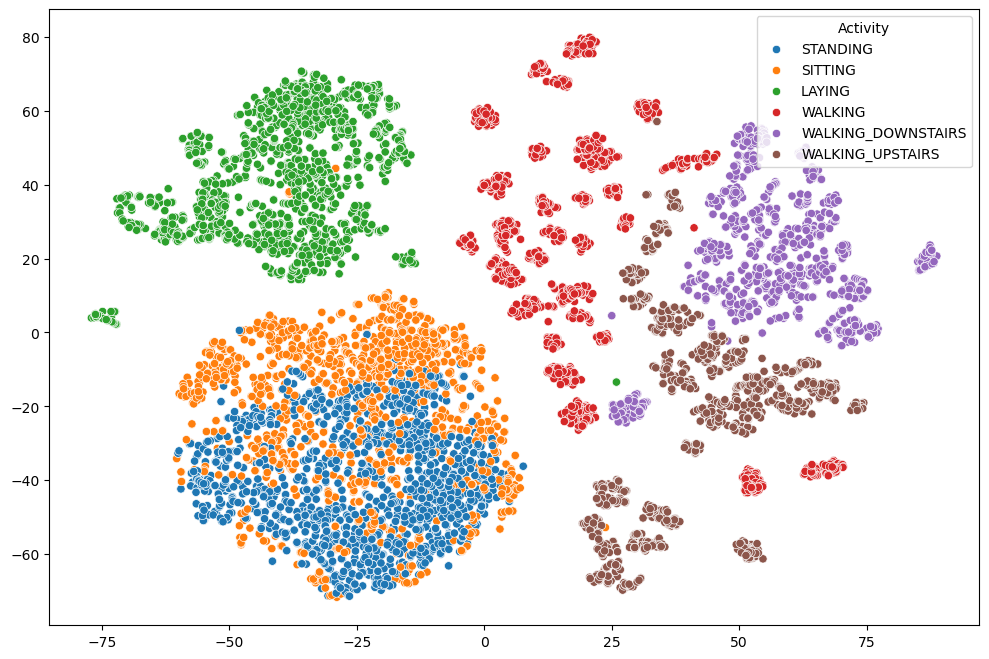

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

ML Models

In [63]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [64]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (7352, 561)
Test data size: (999, 561)


Logistic regression model

In [65]:
from sklearn.linear_model import LogisticRegression

Logistic regression model with Hyperparameter tuning and cross validation

In [66]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [67]:
lr_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print("Accuracy using Logistic Regression:",lr_accuracy)

Accuracy using Logistic Regression: 0.954954954954955


In [69]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [70]:
cm=confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

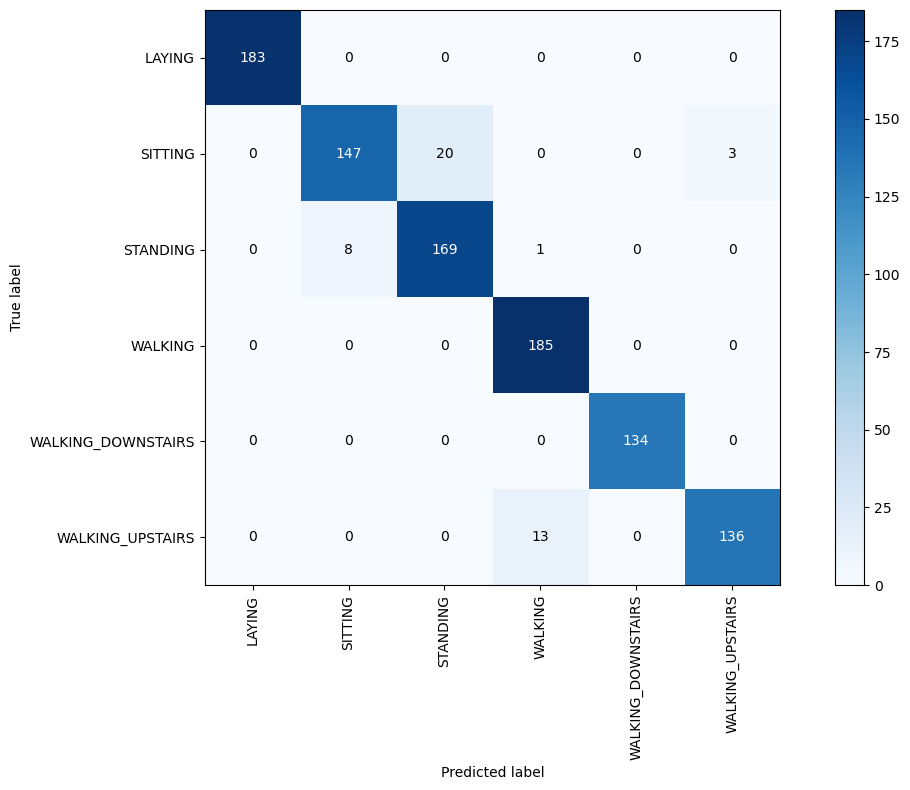

In [71]:
cm=confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [72]:
#functions to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator:",model.best_estimator_)
    print("Best set of parameters:",model.best_params_)
    

In [73]:
#getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(max_iter=500)
Best set of parameters: {'max_iter': 500}


Kernel SVM model with Hyperparameter tuning and cross validation

In [74]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [75]:
y_pred=svm_rs.predict(X_test)

In [76]:
kernel_svm_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy using Kernel SVM:",kernel_svm_accuracy)

Accuracy using Kernel SVM: 0.965965965965966


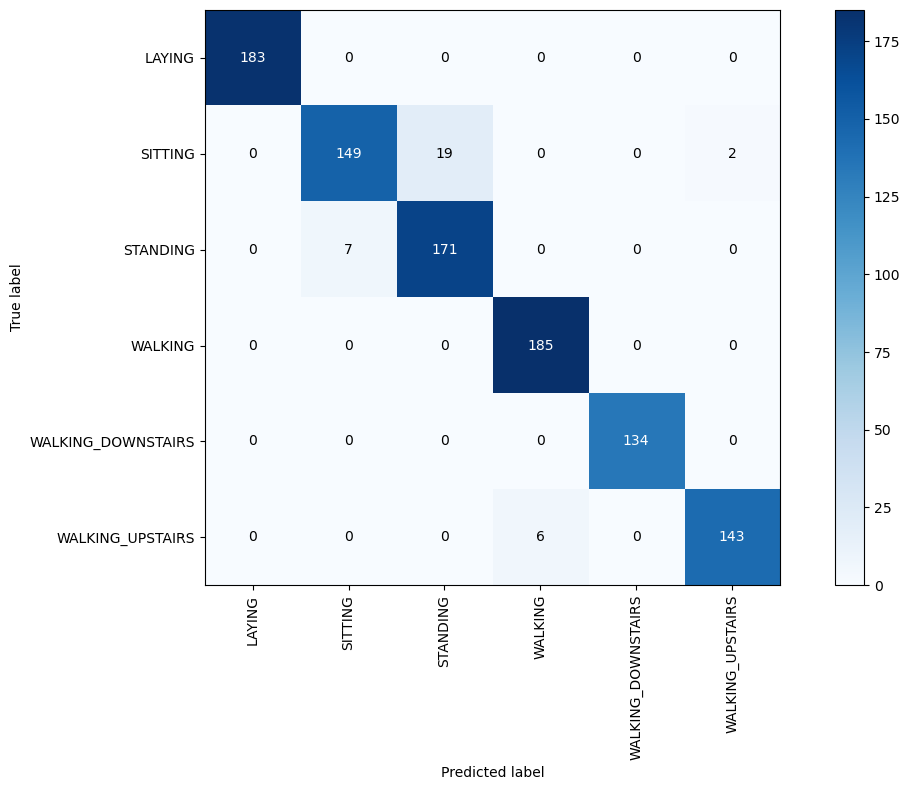

In [77]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [78]:
get_best_randomsearch_results(svm_rs)

Best estimator: SVC(C=50)
Best set of parameters: {'kernel': 'rbf', 'C': 50}


Decision tree model with Hyperparameter tuning and cross validation

In [79]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
parameters={"max_depth":np.arange(2,10,2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state=42)
dt_classifier_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [81]:
y_pred=dt_classifier_rs.predict(X_test)

In [82]:
dt_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Accuracy using Decision tree:",dt_accuracy)

Accuracy using Decision tree: 0.8358358358358359


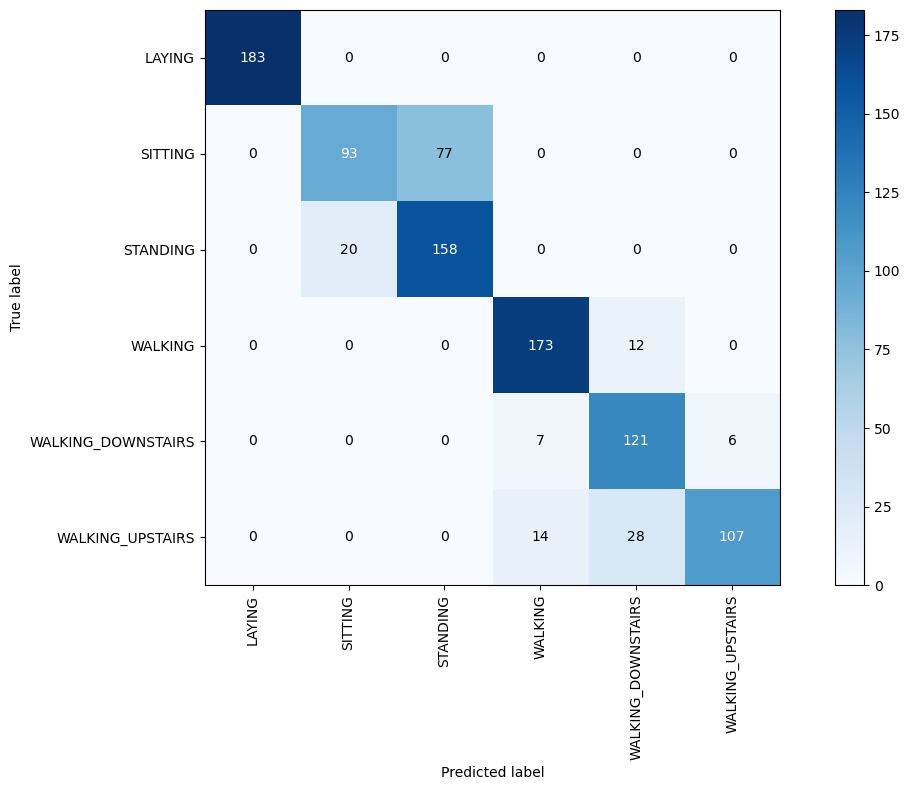

In [83]:
cm=confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [84]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(max_depth=6)
Best set of parameters: {'max_depth': 6}


Random forest model with Hyperparameter tuning and cross validation

In [85]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [86]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(max_depth=6)
Best set of parameters: {'max_depth': 6}


Decision tree model with Hyperparamter tuning and cross validation

In [87]:
np.arange(2,10,2)

array([2, 4, 6, 8])

In [88]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [89]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator: RandomForestClassifier(max_depth=8, n_estimators=30)
Best set of parameters: {'n_estimators': 30, 'max_depth': 8}


In [90]:
y_pred = rf_classifier_rs.predict(X_test)

In [91]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9079079079079079


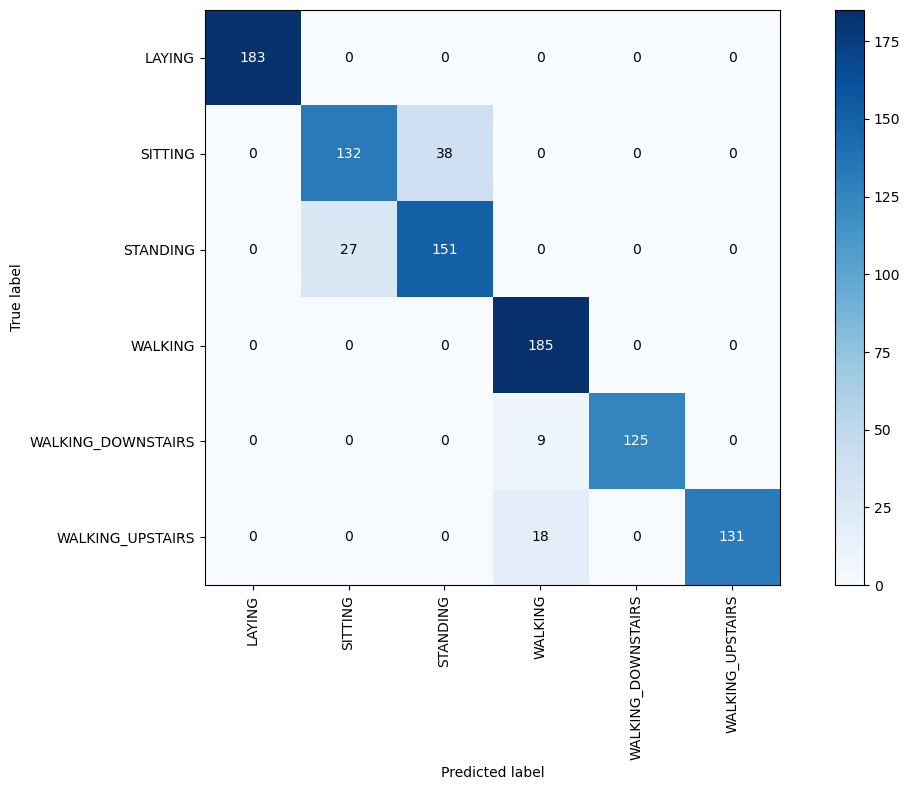

In [92]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))